In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import time

from binarization import binarization_choice

In [2]:
def show_six(imgs, gray = True):
    fig, axes = plt.subplots(2, 3, figsize = (20, 8))
    fig.tight_layout()
    for i in range(len(imgs)):
        if gray:
            axes[i //3, i %3].imshow(imgs[i], "gray")
        else:
            axes[i //3, i %3].imshow(imgs[i])

        axes[i //3, i %3].set_xticks([])
        axes[i //3, i %3].set_yticks([])

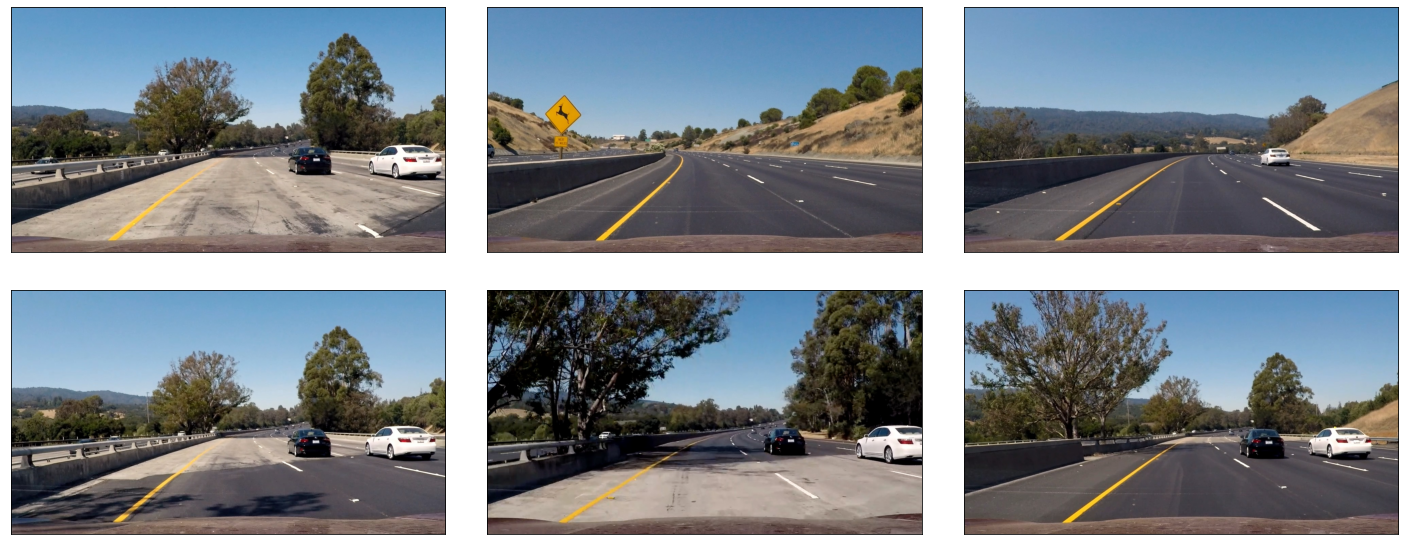

In [3]:
imgs = [plt.imread(f"Project_data/test_images/test{i}.jpg", 0) for i in range(1, 7)]
show_six(imgs, 0)

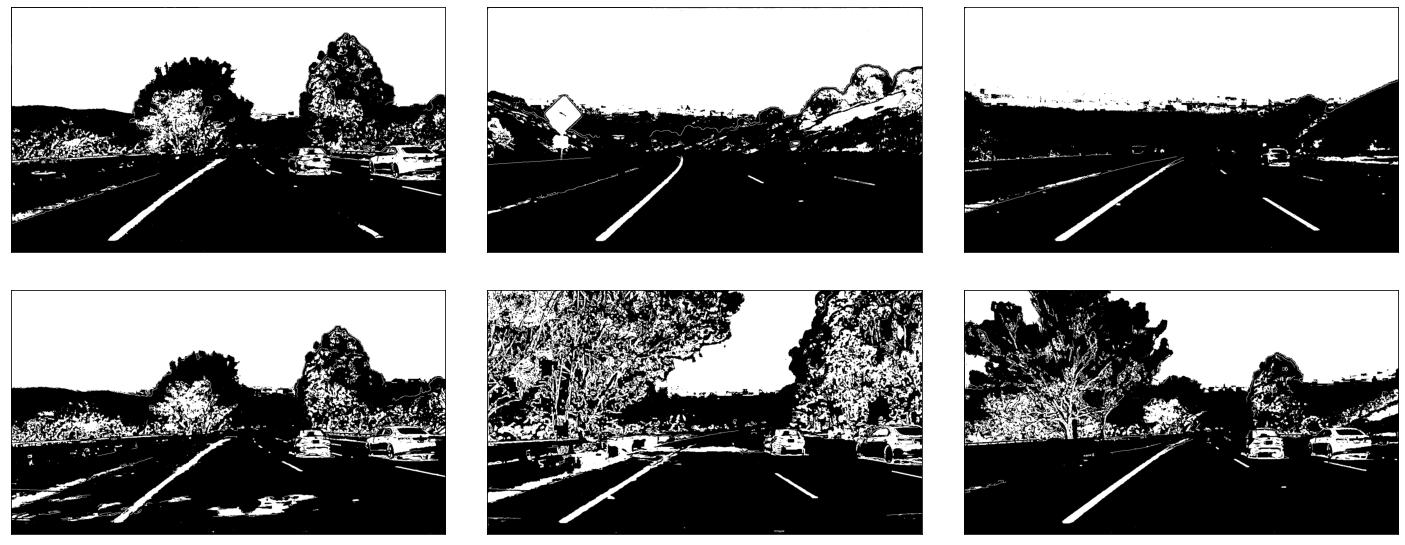

In [4]:
binarizeds = [binarization_choice(img) for img in imgs]
show_six(binarizeds)

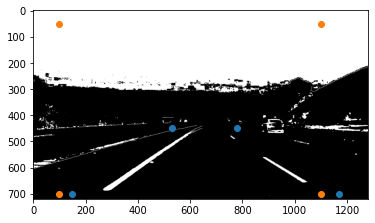

In [63]:
plt.imshow(binarizeds[2],"gray")
plt.scatter(src[:, 0], src[:, 1])
plt.scatter(dst[:, 0], dst[:, 1])

In [64]:
src = np.array([[150, 700], [530, 450], [780, 450], [1170, 700]]).astype(np.float32)
dst = np.array([[100, 700], [100, 50], [1100, 50], [1100, 700]]).astype(np.float32)

In [65]:
def Prespective_transform(img, src, dst):
    M = cv.getPerspectiveTransform(src,dst)
    Minv = cv.getPerspectiveTransform(dst, src)

    PT = cv.warpPerspective(img, M, img.shape[::-1])
    PTinv = cv.warpPerspective(img, Minv, img.shape[::-1])

    return PT, PTinv

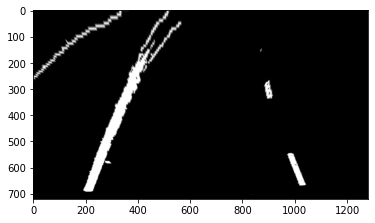

In [69]:
PT, PTinv = Prespective_transform(binarizeds[2], src, dst)
plt.imshow(PT, "gray")

# M = cv.getPerspectiveTransform(src, dst)
# warped = cv.warpPerspective(binarizeds[0], M, binarizeds[0].shape[::-1])

plt.imshow(PT, "gray")

In [70]:
capture = cv.VideoCapture("Project_data/project_video.mp4")
time.sleep(2)

while (True):
    ret, frame = capture.read()
    
    binary = binarization_choice(frame)
    PT, PTinv = Prespective_transform(binary, src, dst)



    cv.imshow("Video", PT)

    if cv.waitKey(20) & 0xFF == ord('q'):
        break
# cv.waitKey(0)
capture.release()
cv.destroyAllWindows()